# Yêu cầu 5: Thích thì làm 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock_df = pd.read_csv ('Data_Demo.csv', index_col =['Time'], parse_dates=True)
stock_df

#index_col = ['Chỉ tiêu']: có thể được sử dụng để buộc Pandas sử dụng cột đầu tiên làm chỉ mục
#parse_dates: định dạng cột là ngày

,Adj Closed Price (GOOG),Adj Closed Price (LMT)
Time,,
2017-01-01,796.789978,217.490036
2017-04-01,905.960022,234.776657
2017-07-01,930.500000,256.181854
2017-10-01,1016.640015,271.844910
2018-01-01,1169.939941,314.996796
2018-04-01,1017.330017,286.405762
2018-07-01,1217.260010,292.926086
2018-10-01,1076.770020,265.607361
2019-01-01,1116.369995,263.765961


In [3]:
#Phần trăm (%) lợi nhuận thay đổi của 2 mã AA, GOOG
r = stock_df.apply(pd.to_numeric, errors='coerce').pct_change()
r

#pd.to_numeric: chuyển chuỗi ký tự thành chuỗi số 
#errors='coerce': 

,Adj Closed Price (GOOG),Adj Closed Price (LMT)
Time,,
2017-01-01,NaN,NaN
2017-04-01,0.137012,0.079482
2017-07-01,0.027087,0.091173
2017-10-01,0.092574,0.061140
2018-01-01,0.150791,0.158737
2018-04-01,-0.130443,-0.090766
2018-07-01,0.196524,0.022766
2018-10-01,-0.115415,-0.093261
2019-01-01,0.036777,-0.006933


In [4]:
#Lợi nhuận kỳ vọng
e_r = stock_df.resample('Q').last().pct_change().mean()
e_r

Adj Closed Price (GOOG)    0.076531
Adj Closed Price (LMT)     0.025757
dtype: float64

In [5]:
#Phương sai
var_r = r.var()
var_r

Adj Closed Price (GOOG)    0.010931
Adj Closed Price (LMT)     0.009460
dtype: float64

In [6]:
#Độ lệch chuẩn
r_vol = np.sqrt(var_r)
r_vol

Adj Closed Price (GOOG)    0.104551
Adj Closed Price (LMT)     0.097264
dtype: float64

In [7]:
#Ma trận hiệp phương sai
cov_matrix = stock_df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,Adj Closed Price (GOOG),Adj Closed Price (LMT)
Adj Closed Price (GOOG),0.009803,0.005177
Adj Closed Price (LMT),0.005177,0.008934


In [8]:
p_ret = [] # Xác định một mảng lợi nhuận trống để trả về danh mục đầu tư
p_vol = [] # Xác định một mảng độ lệch chuẩn trống cho sự biến động của danh mục đầu tư
p_weights = [] # Xác định một mảng trống cho trọng số của danh mục đầu tư

num_assets = len(stock_df.columns)
num_portfolios = 500 #Giới hạn số phần tử của danh mục đầu tư là 1000
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, e_r) # Lợi nhuận là tích số của lợi nhuận kỳ vọng của từng tài sản và trọng số của nó 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Phương sai danh mục đầu tư
    sd = np.sqrt(var) # Độ lệch chuẩn hằng quý
    p_vol.append(sd)

In [9]:
# Tạo khung dữ liệu cho danh mục đầu tư
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(stock_df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(data)
portfolios

,Returns,Volatility,Adj Closed Price (GOOG) weight,Adj Closed Price (LMT) weight
0,0.039743,0.086606,0.275466,0.724534
1,0.048292,0.085151,0.443847,0.556153
2,0.068464,0.092438,0.841136,0.158864
3,0.041696,0.086033,0.313921,0.686079
4,0.058403,0.086998,0.642982,0.357018
...,...,...,...,...
495,0.061462,0.088293,0.703226,0.296774
496,0.072866,0.095807,0.927826,0.072174
497,0.071445,0.094659,0.899832,0.100168
498,0.051909,0.085370,0.515069,0.484931


In [10]:
sns.set_style('dark')

[Text(0.5, 1.0, 'ĐƯỜNG CONG HIỆU QUẢ')]

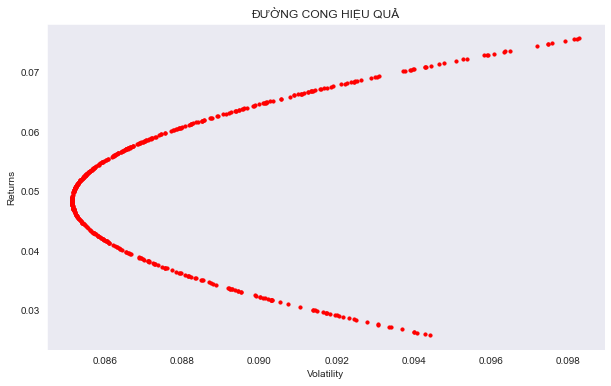

In [11]:
5# Vẽ đường biên hiệu quả
portfolios.plot.scatter(x='Volatility', y='Returns', color = 'r',s=10,alpha = 1,
                   grid = False,figsize=[10,6]).set(title = 'ĐƯỜNG CONG HIỆU QUẢ')

In [12]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin () cho biết giá trị nhỏ nhất trong cột được chỉ định.                              
min_vol_port

Returns                           0.048501
Volatility                        0.085150
Adj Closed Price (GOOG) weight    0.447948
Adj Closed Price (LMT) weight     0.552052
Name: 345, dtype: float64